# Title:

## Predicting Extend of Heart Disease with Classification

# Introduction:

For my project proposal, I will be using a modified version of the UCI Heart Disease dataset provided by DSCI100. The UCI Heart Disease dataset includes four databases of the countries: Cleveland, Hungary, Switzerland, and the VA Long Beach. I will be using Cleveland for my prediction because the dataframe has the most observations out of the four options, as a larger dataset should lead to a better model. The Heart Disease Cleveland dataframe includes the variables: "trestbps" and "thalach", which I will be using to predict the variable of intrest: "num". In the dataframe, "trestbps" refers to the resting blood pressure on admission to the hospital measured in mm Hg, while "thalach" refers to maximum heart rate achieved measured in bps, and "num" means the diagnosis of heart disease with a value of: 0 means no heart disease, 1-4 refering to various levels of heart disease (Classified as 1: Mild, 2: Moderate, 3: Severe 4: Life threatening). With these resources, I will be answering the question: Can I predict the extent of heart disease through classification using the variables resting blood pressure and maximum heart rate achieved?

In [5]:
library(tidyverse)
library(tidymodels)
library(repr)
options(repr.matrix.max.rows = 6)

# Preliminary Data Analysis: 

## Reading data
To load the Cleveland Heart Disease data from our data folder we must run the read_csv function

In [18]:
# Read data here: 
cleveland_data <- read_csv("data/heart_disease/processed.cleveland.data")

cleveland_data

New names:
• `1.0` -> `1.0...2`
• `1.0` -> `1.0...3`
• `1.0` -> `1.0...6`
• `0.0` -> `0.0...9`
• `0.0` -> `0.0...12`
Rows: 302 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): 0.0...12, 6.0
dbl (12): 63.0, 1.0...2, 1.0...3, 145.0, 233.0, 1.0...6, 2.0, 150.0, 0.0...9...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


63.0,1.0...2,1.0...3,145.0,233.0,1.0...6,2.0,150.0,0.0...9,2.3,3.0,0.0...12,6.0,0
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


## Data Wrangling

As you can see right now, the data currently is incomprehensible we must clean and wrangle the data to be something that we can understand. The first part of this is to assign correct column names as stated on the UCI website (https://archive.ics.uci.edu/dataset/45/heart+disease). To do this, we will run the colnames function on our dataframe.

In [19]:
colnames(cleveland_data) <- c('age','sex','cp','trestbps','chol','fbs', 'restcg', 
                              'thalach','exang','oldpeak','slope','ca','thal','num')
cleveland_data

age,sex,cp,trestbps,chol,fbs,restcg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


Now that we have the correct column names in place we need to convert the variable type of the columns to match the UCI website. To do this, we will use the mutate function in combonation with as.numeric to convert to dbl, as_factor to convert to fct and fct_recode to rename the values for variables.

In [20]:

cleveland_clean <- cleveland_data |>
                    mutate(age = as.numeric(age), sex = as_factor(sex), cp = as_factor(cp),
                           trestbps = as.numeric(trestbps), chol = as.numeric(chol), fbs = as_factor(fbs),
                           restcg = as_factor(restcg), thalach = as.numeric(thalach), exang = as_factor(exang),
                           oldpeak = as.numeric(oldpeak), slope = as.numeric(slope), ca = as.numeric(ca),
                           thal = as_factor(thal), num = as.factor(num)) |>
                    mutate(sex = fct_recode(sex, "male" = "1", "female" = "0"),
                           num = fct_recode(num, "No heart disease" = "0", "Mild"="1", "Moderate" = "2",
                                            "Serious" = "3", "Life threatening" = "4"))

cleveland_clean

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `ca = as.numeric(ca)`.
Caused by warning:
! NAs introduced by coercion”


age,sex,cp,trestbps,chol,fbs,restcg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<fct>,<fct>
67,male,4,160,286,0,2,108,1,1.5,2,3,3.0,Moderate
67,male,4,120,229,0,2,129,1,2.6,2,2,7.0,Mild
37,male,3,130,250,0,0,187,0,3.5,3,0,3.0,No heart disease
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,male,4,130,131,0,0,115,1,1.2,2,1,7.0,Serious
57,female,2,130,236,0,2,174,0,0.0,2,1,3.0,Mild
38,male,3,138,175,0,0,173,0,0.0,1,NA,3.0,No heart disease


Now that we have cleaned the data we can use the select function to only show the predictor variables `trestbps`, `thalach`, and the variable of interest `num`

In [23]:
cleveland_clean_select <- cleveland_clean |> select(trestbps, thalach, num)
cleveland_clean_select

trestbps,thalach,num
<dbl>,<dbl>,<fct>
160,108,Moderate
120,129,Mild
130,187,No heart disease
⋮,⋮,⋮
130,115,Serious
130,174,Mild
138,173,No heart disease


After selecting the columns we are interested in, we need to split the data into training and testing sets, using 75% of the data for training and saving the other 25% for testing. We also use the set.seed function so the results are reproducible.

In [26]:
set.seed(1)
cleveland_split <- initial_split(cleveland_select, prop = 0.75, strata = num)
cleveland_train <- training(cleveland_split)
cleveland_test <- testing(cleveland_split)

cleveland_train

trestbps,thalach,num
<dbl>,<dbl>,<fct>
140,155,Mild
140,158,Mild
150,112,Mild
⋮,⋮,⋮
128,130,Serious
164,90,Serious
130,115,Serious


# Preliminary Plot

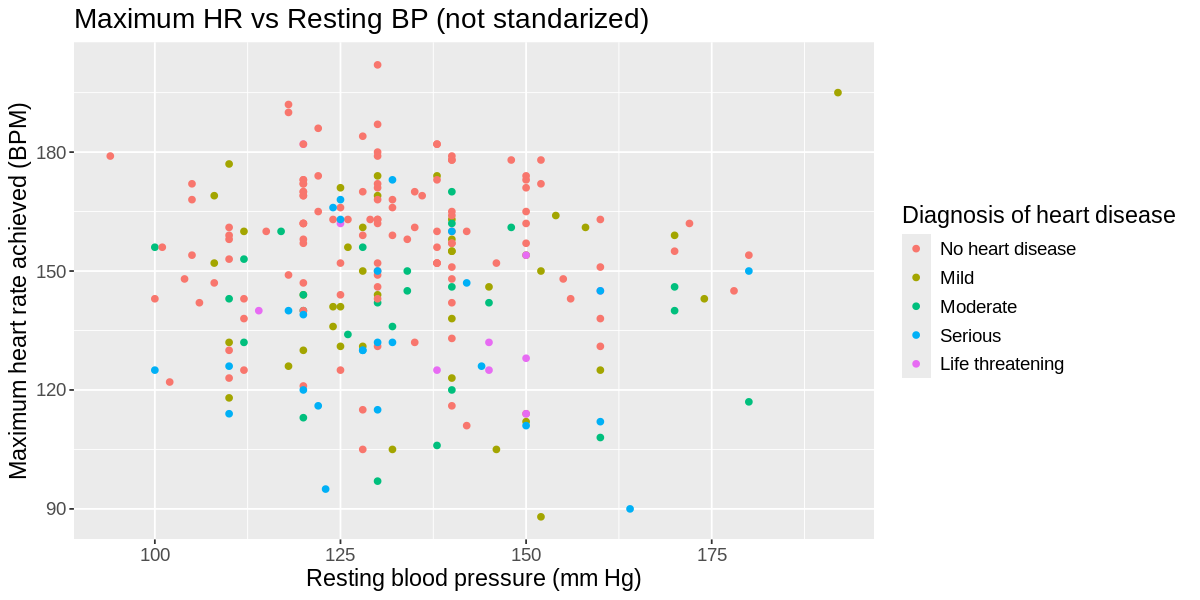

In [28]:
options(repr.plot.width = 10, repr.plot.height =5)


cleveland_train_plot <- cleveland_train |>
                        ggplot(aes(x = trestbps, y = thalach, color = num)) +
                        geom_point() +
                        labs(x = "Resting blood pressure (mm Hg)",y = "Maximum heart rate achieved (BPM)", 
                             color = "Diagnosis of heart disease", title = "Maximum HR vs Resting BP (not standarized)") +
                        theme(text = element_text(size = 14))

cleveland_train_plot

# Methods:

I will conduct my data analysis using the variable`trestbps` and `thalach` to predict the variable of interest `num` using the k-nearest neighbor classification model. I believe that resting blood pressure and maximum heart rate achieved would be a contributing factor to the severity of heart disease. To visualize the result I will use a colored scatter plot with different colors refering to different levels of heart diseases.

## Expected outcomes and significance:

What do you expect to find?
- I expect to find that the k-nearest neighbors algorithm will be able to predict the severity of heart disease to a degree using only data from resting blood pressure and maximum heart rate.

What impact could such findings have?
- The impact of such findings could lead to better and sooner diagnostics of heart disease using data which can be found in a few minutes.

What future questions could this lead to?
- This could lead to future questions around how to increase the accuracy of the model as well as exploring taking into account other variables to predict the diagnosis of heart disease. to?